# Copy Image for re-2020AGC

In [8]:
from pathlib import Path
from tqdm import tqdm
import os
import shutil


IMG_PATH = '/ssd_2/RecycleTrash/org'
JSON_PATH = '/ssd_2/RecycleTrash/org/2021AGC/211014_data_re'

# 2020AGC 안의 이미지 파일 목록
img_file_list = list(Path(IMG_PATH).rglob('*.jpg'))
img_file_idx = {img.name[:-3]:idx for idx,img in enumerate(img_file_list)}

# 새로 받은 json 파일 목록
json_file_list = list(Path(JSON_PATH).rglob('*.json'))
for json_file in tqdm(json_file_list):
    filename = json_file.name[:-4]

    if filename not in img_file_idx.keys():
        print(filename)
    
    # json 파일에 해당하는 이미지파일 경로
    img_file = img_file_list[img_file_idx[filename]]

    # 파일 복사
    shutil.copy(str(img_file), JSON_PATH)

100%|██████████| 14114/14114 [02:08<00:00, 109.89it/s]


# Check Bbox Image

In [1]:
from check_bboxImage import *

In [2]:
# img_path = '../../../RecycleTrash/org/followstudy/210906_hard/IMG_20210708_152724.jpg'
# 6 0.46025795003300113 0.466589370922193 0.0002705012929961719 0.0001521569773103467


In [2]:
img_list = list(Path('../../../RecycleTrash/yolo/images/AGC2021_sample/').glob('*.jpg'))

for img_path in img_list:
    img, _, _ = load_img(str(img_path))
    txt_path = 'labels'.join(str(img_path).split('images'))[:-3]+'txt'
    txt_labels = load_txt(txt_path)
    result = plotimage(img, txt_labels, show=False)

    # cv2.imwrite(f"img/{txt_path.split('/')[-1][:-3]+'jpg'}", result)

/ssd_2/haejin/yolov5/custom/check_bboxImage.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [5]:
# mg_path = '../../../RecycleTrash/yolo/images/211014_data/21000.jpg'
# org_img_path = get_orgPath(img_path)
org_img_path = '/home/haejin/ssd_2/RecycleTrash/org/2021AGC/211021_data/sc009486.jpg'
# org_img_path ='/home/haejin/ssd_2/RecycleTrash/org/2021AGC/211021_data/sc009486.jpg'

json_path = org_img_path[:-3] + 'json'
# txt_path = 'labels'.join(img_path.split('images'))[:-3]+'txt'

In [3]:
txt_labels

[[2,
  0.40052186604979073,
  0.3099679322415608,
  0.10568131747080853,
  0.16095077231891505],
 [6,
  0.4915730337078652,
  0.394115199138332,
  0.2753910552985239,
  0.23010452620498884],
 [1,
  0.5015559594624367,
  0.5966806198134684,
  0.11084489975765584,
  0.21052116227264936]]

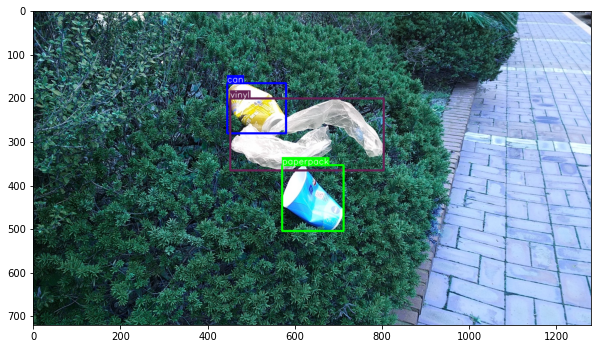

In [2]:
img_path = '/ssd_2/RecycleTrash/yolo/images/test_211026_405/20211021_131403.jpg'
txt_path = 'labels'.join(img_path.split('images'))[:-3]+'txt'

img , h, w = load_img(img_path)
txt_labels = load_txt(txt_path)

result = plotimage(img, txt_labels)

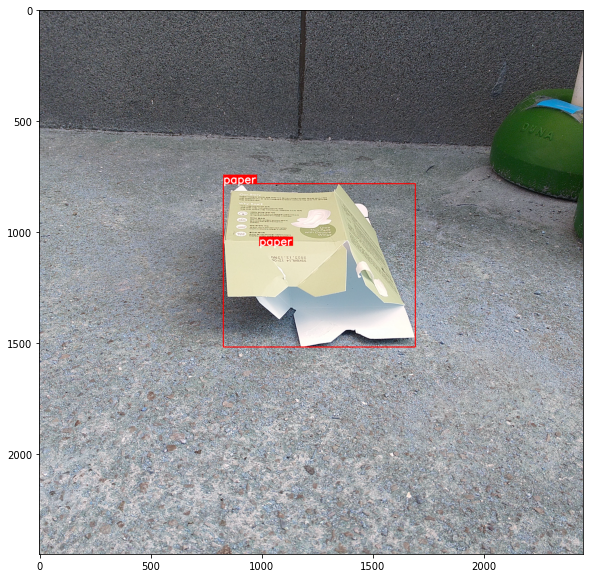

In [6]:
# img, _, _ = load_img(img_path) # rotate=cv2.ROTATE_90_CLOCKWISE) # opt='pil')
img , h, w = load_img(org_img_path)
# img_resized = resize_img(img)
json_labels = load_json(json_path, h, w)
# txt_labels = load_txt(txt_path)

result = plotimage(img, json_labels)
# plotimage(img, json_labels)

# Check dataset dist

In [1]:
# 데이터셋 'Image Orientation' 확인

from pathlib import Path
from tqdm import tqdm

In [ ]:
# 데이터셋 'Image Orientation' 확인
img_list = list(Path('/ssd_2/RecycleTrash/org').rglob('*.jpg'))

ori_list = []
num_list = []

for img_path in tqdm(img_list):
    with open(str(img_path), 'rb') as f:
        tags = exifread.process_file(f)
        try:
            ori = tags['Image Orientation'].values
        except:
            continue

        if ori not in ori_list:
            ori_list.append(ori)

print(ori_list)

In [1]:
import sys
sys.path.append('../')

from check_datasetdist import *

In [2]:
BASE_PATH = '/home/haejin/ssd_2/RecycleTrash/yolo/labels'
# alldata, agc2020, followstudy, all2020, agc2021

In [3]:
get_tvt_info(BASE_PATH, all2020)

KeyboardInterrupt: 

<Figure size 720x216 with 0 Axes>

이미지 개수
  train_list : [ 64337]
  valid_list : [  1287]
   test_list : [  1287]
-----------------------
         all : [ 66911]

클래스 별 object 개수
                      c_1      c_2      c_3      c_4      c_5      c_6      c_7
  train_list : [    40030    20853    28945    17043    17723    22997    18960] -> sum :    166551
  valid_list : [     1289      561      499      279      231      353      947] -> sum :      4159
   test_list : [     1289      561      499      279      231      353      947] -> sum :      4159
--------------------------------------------------------------------------------
         all : [    42608    21975    29943    17601    18185    23703    20854] -> sum :    174869

object 개수 별 이미지 개수
               [     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20]
-----------------------------------------------------------------------------------------------------------------------------------------

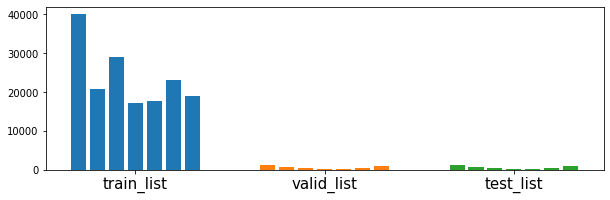

In [3]:
get_tvt_info(BASE_PATH, agc2021)

이미지 개수
  train_list : [ 69181]
  valid_list : [   452]
   test_list : [   452]
-----------------------
         all : [ 70085]

클래스 별 object 개수
                   c_1   c_2   c_3   c_4   c_5   c_6   c_7
  train_list : [ 11631  6998 43811 28398 27460 49950 38484] -> sum :   206732
  valid_list : [   182   142   169   142   125   192   180] -> sum :     1132
   test_list : [   182   142   169   142   125   192   180] -> sum :     1132
-----------------------------------------------------------
         all : [ 11995  7282 44149 28682 27710 50334 38844] -> sum :   208996

object 개수 별 이미지 개수
               [     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20]
-----------------------------------------------------------------------------------------------------------------------------------------
  train_list : [ 29015  9581  6619  2852  7723  7840  3544  1428   435   103    36     4     0     1     0     0     0     0     

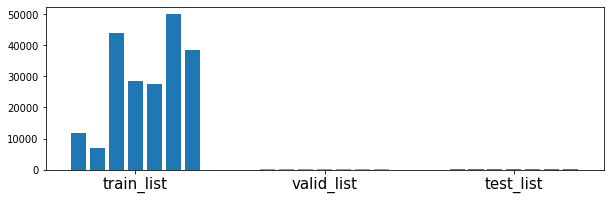

In [7]:
get_tvt_info(BASE_PATH, agc2021)

# Check train image

In [1]:
import sys
sys.path.append('../')

from check_trainImage import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
train_path = get_data_dict('data/agc2021.yaml')
hyp = get_hyp_dict('hyp/hyp.myset.yaml')

dataloader, dataset = create_data(train_path, hyp, '/home/haejin/ssd_2/haejin/yolov5/custom')

train: Scanning '../../../RecycleTrash/yolo/labels/211014_data_re' images and labels...30869 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 30869/30869 [00:03<00:00, 9006.81it/s]


In [3]:
for idx, (img0, lb, path, shapes) in enumerate(tqdm(dataloader)):
    if idx < 10:
        img = img0[0].numpy().transpose(1, 2, 0).copy()
        h = img.shape[0]
        w = img.shape[1]
        lb = lb[:,1:].numpy()

        for bbox in lb:
            bbox = [0, (bbox[1]-bbox[3]/2)*w, (bbox[2]-bbox[4]/2)*h, bbox[3]*w, bbox[4]*h]
            bbox = [int(x) for x in bbox]
            img = cv2.rectangle(img, (bbox[1],bbox[2]), (bbox[1]+bbox[3],bbox[2]+bbox[4]), (0,0,255), 2)   

        cv2.imwrite(f"./img/train_{idx}.jpg", img)
    else :
        break

# plt.figure(figsize=(10,10))
# plt.imshow(img)

  0%|          | 10/30869 [00:08<7:39:19,  1.12it/s]


# Clean weights

In [6]:
from cleanWeights import *

In [7]:
weight2pretrained('./weights_365_s6/object365_yolov5x6_epoch14_346.pt')

# Get DIR size

In [2]:
def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total

In [3]:
gb = get_dir_size('../../../RecycleTrash/yolo/images/')
f"{gb / 1E9:.1f}GB", f"{gb / 1E6:.1f}MB"

('66.6GB', '66592.2MB')

# Labelme to YOLO

In [8]:
from labelme2yolo import *

In [12]:
BASE_PATH = '/home/haejin/ssd_2/RecycleTrash/org/2021AGC'
TARGET_PATH = '/home/haejin/ssd_2/RecycleTrash/yolo'
dirname  = 'for2021AGC_1'

In [13]:
check_num(dirname, TARGET_PATH)


>> check_num! 
[for2021AGC_1] - OK!


In [ ]:
# copy_img(BASE_PATH, dirname, TARGET_PATH)
# resize_img(dirname, TARGET_PATH)
# convert_yolo_txt(BASE_PATH, dirname, TARGET_PATH)
# check_img(dirname, TARGET_PATH)

In [1]:
# coco json check

In [2]:
import json

In [7]:
with open('/ssd_2/RecycleTrash/yolo/annotations/valid.json') as f:
    data = json.load(f)
len(data['images'])

15029

In [6]:
len(data['images'])

482